# This Notebook, *GRIP_Task_1.ipynb*, has been created as a part of **Graduate Rotational Internship Program (GRIP - Nov 2020)** organised by **The Sparks Foundation**.



## **Task - 1: Prediction Using Supervised ML**
### Q. Predict the percentage of a student based on his no. of study hours.

(*Note: This is a simple linear regression task as it involves just two variables.*)

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: **Depender Kumar soni**
**(Intern at The Sparks Foundation)**
**(GRIP - Nov 2020)**

## Stage 1: Data Aquisition and Preprocesssing.
Role of libraries imported:\
numpy - is used to apply mathematical functions and operations to arrays.\
matplotlib - used for Visualization purposes such as ploting graphs for various datapoints.\
pandas - is basically a dataframe management tool.

In [35]:
# importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit

In [4]:
# importing data from remote link
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data imported Successfully!")

Data imported Successfully!


In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.shape

(25, 2)

In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.nunique()

Hours     23
Scores    23
dtype: int64

In [14]:
data.isna().any()

Hours     False
Scores    False
dtype: bool

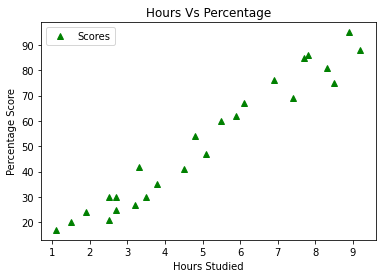

In [15]:
# Let's see the scatter plot for our data.
data.plot(x='Hours', y='Scores', style='g^')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**This graph clearly shows that there is some linear relation between Percentage Scored and the hours of Study.**

## Stage - 2: Preparing the Data

In [21]:
# Dividing the data for input and output values.
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [22]:
# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
pd.DataFrame(data=x_train).head()

,0
0,3.8
1,1.9
2,7.8
3,6.9
4,1.1


### Stage - 3: Training the algorithm

In [54]:
# Here we are using LinearRegression for training our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training Completed Successfully!")

Training Completed Successfully!


In [51]:
# As our np arrays are two dimensional, they would not be accepted by np.polyfit()
# Let's make them 1D
x = []
y = []
for i in range(len(X)):
  tempx = X[i]
  x.append(tempx[0])

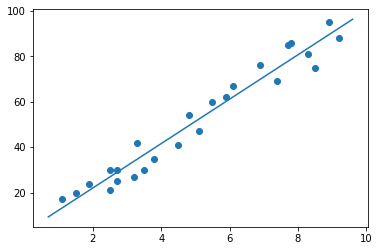

In [52]:
# Create scatter plot
plt.scatter(X, Y)

# Add correlation line
axes = plt.gca()
m, b = np.polyfit(x, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1], len(X))
plt.plot(X_plot, m*X_plot + b, '-')

## Stage - 4: Making Predictions

In [55]:
# Let's print x_test
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [56]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [59]:
# Now testing for our own value given in problem statement
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


## Stage - 5: Evaluating the model

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.**

In [62]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002982
